# Relatively high number of Vehicle Thefts during Friday Nights in Seattle
This report focuses on the investigation of vehicle thefts in the city of Seattle during the summer of 2014.

You can follow the code used throughout this notebook.
Let's start with some library imports.

In [99]:
import pandas as pd
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt
%matplotlib inline
import time
from mpl_toolkits.basemap import Basemap

Next, we load the data.

In [100]:
df = pd.read_csv("seattle_incidents_summer_2014.csv")

First, I wanted to see what the most frequent types of reported incidents were during the given period.

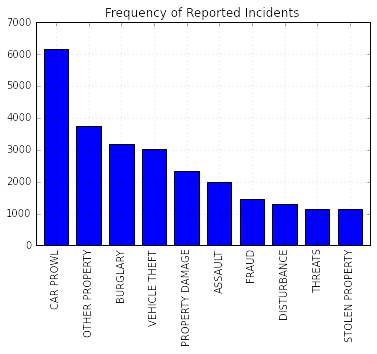

In [101]:
df["Summarized Offense Description"].value_counts()[:10].plot(kind="bar").set_title('Frequency of Reported Incidents')

Clearly, car prowl related incidents are by far the most ones, then there is a drop to miscellanous property incidents, closely followed by burglary and vehicle theft.
I decided to further investigate vehicle theft, as it seems to be the least generic category, which should allow some inferences to be made.

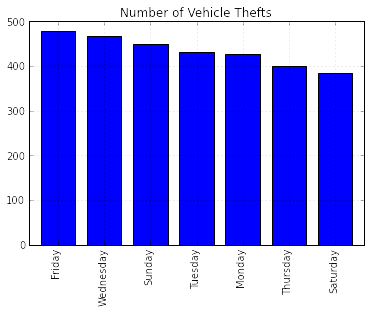

In [102]:
wday_map = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
df["Occurred WeekDay"] = [wday_map[time.strptime(d, "%m/%d/%Y %H:%M:%S %p").tm_wday] 
                          for d in df.loc[:, "Occurred Date or Date Range Start"].values]
vehicle_index = df["Summarized Offense Description"] == "VEHICLE THEFT"
df.loc[vehicle_index, "Occurred WeekDay"].value_counts().plot(kind="bar").set_title("Number of Vehicle Thefts")
plt.show()

Okay, Saturday seems to be the most quiet day, while most vehicle thefts occurr on Fridays.
## Visual inspection
But does this hold for all locations - or are there some deviations throughout the week?

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-122.44,47.48,-122.2,47.77&bboxSR=4269&imageSR=4269&size=1500,1812&dpi=96&format=png32&f=image


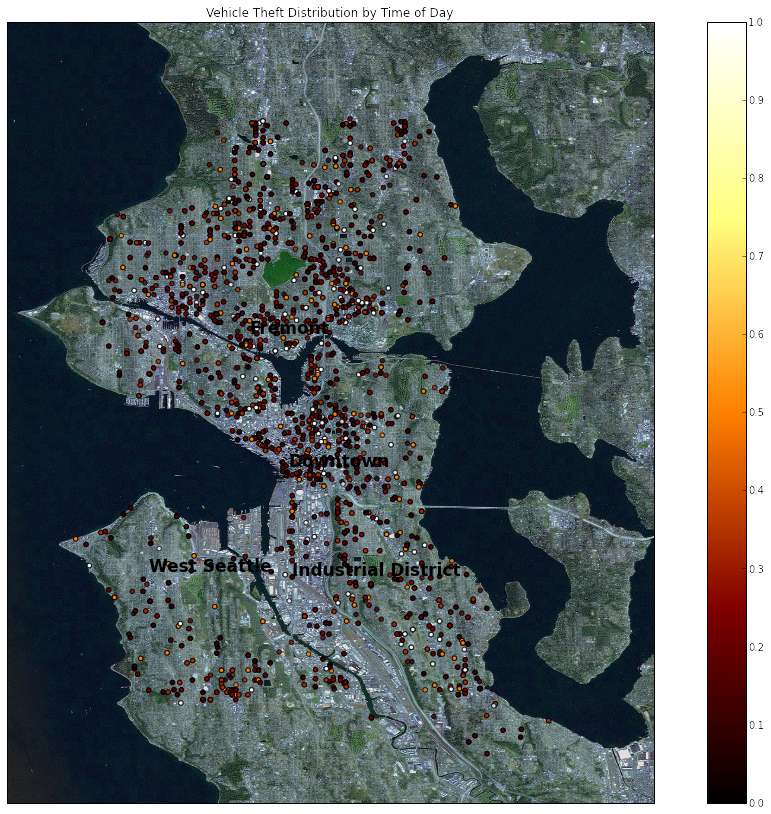

In [103]:
hour_color = [time.strptime(d, "%m/%d/%Y %H:%M:%S %p").tm_hour
                          for d in df.loc[vehicle_index, "Occurred Date or Date Range Start"].values]
hour_color = [1.0 / (np.abs(x - 12) + 1.0) for x in hour_color]
import matplotlib.cm as cm
from pylab import rcParams

cmap = cm.afmhot
norm = colors.Normalize(vmin=0, vmax=1)
m = cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array(hour_color)
rcParams['figure.figsize'] = 19, 14

location_lons = [-122.334652, -122.387009, -122.349243, -122.334137] 
location_lats = [47.604716, 47.565871, 47.654057, 47.564249]
location_names = ["Downtown", "West Seattle", "Fremont", "Industrial District"]

mean_lat = 47.60
mean_long = -122.32
size = 0.12
map = Basemap(projection='cyl', lat_0 = mean_lat, lon_0 = mean_long,
    resolution = 'i', area_thresh = 0.1,
    llcrnrlon=mean_long - size , llcrnrlat=mean_lat - size,
    urcrnrlon=mean_long + size, urcrnrlat=mean_lat + size + 0.05 , epsg=4269)
lons = df.loc[vehicle_index, "Longitude"].values
lats = df.loc[vehicle_index, "Latitude"].values
map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True, zorder=0)
x_l,y_l = map(location_lons, location_lats)
for i in xrange(len(x_l)):
    plt.text(x_l[i], y_l[i], location_names[i], fontsize=17, weight = 'bold')
x,y = map(lons, lats)
for i in xrange(len(x)):
    plt.scatter(x[i], y[i], marker='o', c=m.to_rgba(hour_color[i]) , alpha=0.8)
plt.colorbar(m)
plt.title('Vehicle Theft Distribution by Time of Day')
plt.show()

This plot shows every vehicle theft on the city map of seattle, where the color represents daylight, i.e. white is approximately noon, while black corresponds to midnight. I tried to mimick the rise of the sun via a reciprocal function of the absolute distance to 12 AM. So it's not a linear sunrise and dawn, but exponential. It seems that some areas are more prone to thefts during the day than night.

## Friday Night
Let's see how this looks for the weekday with most vehicle thefts. We can see a relatively high number of during the night vehicle thefts on Friday.

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-122.44,47.48,-122.2,47.77&bboxSR=4269&imageSR=4269&size=1500,1812&dpi=96&format=png32&f=image


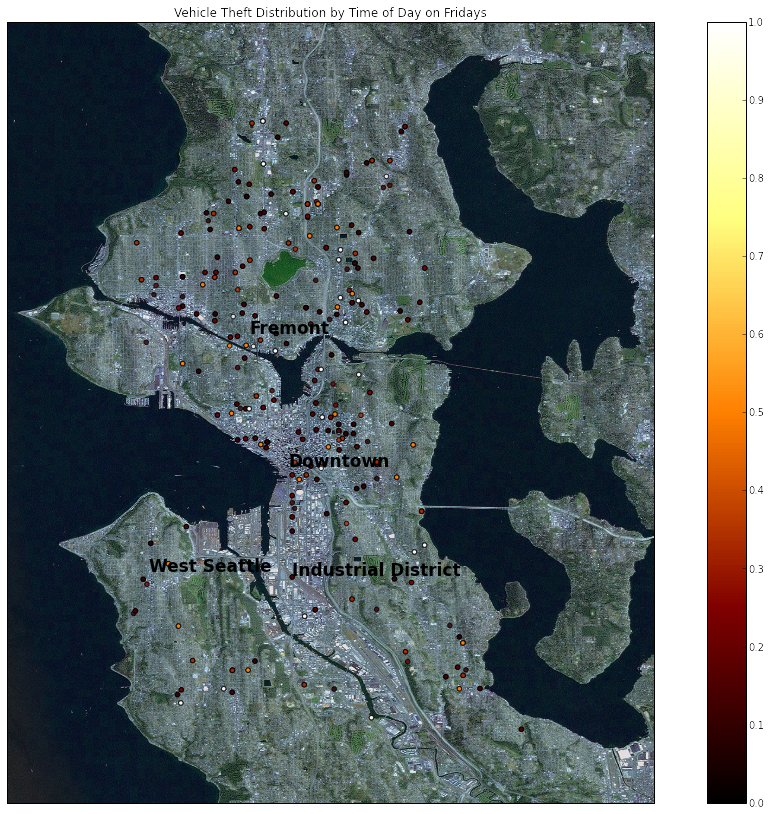

In [104]:
friday_vehicle_index = vehicle_index & (df.loc[:, "Occurred WeekDay"] == "Friday")
hour_color = [time.strptime(d, "%m/%d/%Y %H:%M:%S %p").tm_hour
                          for d in df.loc[friday_vehicle_index, "Occurred Date or Date Range Start"].values]
hour_color = [1.0 / (np.abs(x - 12) + 1.0) for x in hour_color]

map = Basemap(projection='cyl', lat_0 = mean_lat, lon_0 = mean_long,
    resolution = 'i', area_thresh = 0.1,
    llcrnrlon=mean_long - size , llcrnrlat=mean_lat - size,
    urcrnrlon=mean_long + size, urcrnrlat=mean_lat + size + 0.05, epsg=4269)
lons = df.loc[friday_vehicle_index, "Longitude"].values
lats = df.loc[friday_vehicle_index, "Latitude"].values
map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True, zorder=0)
for i in xrange(len(x_l)):
    plt.text(x_l[i], y_l[i], location_names[i], fontsize=17, weight = 'bold')
x,y = map(lons, lats)
for i in xrange(len(x)):
    plt.scatter(x[i], y[i], marker='o', c=m.to_rgba(hour_color[i]) , alpha=0.8)
plt.colorbar(m)
plt.title('Vehicle Theft Distribution by Time of Day on Fridays')
plt.show()

Compare this to Saturdays:

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-122.44,47.48,-122.2,47.77&bboxSR=4269&imageSR=4269&size=1500,1812&dpi=96&format=png32&f=image


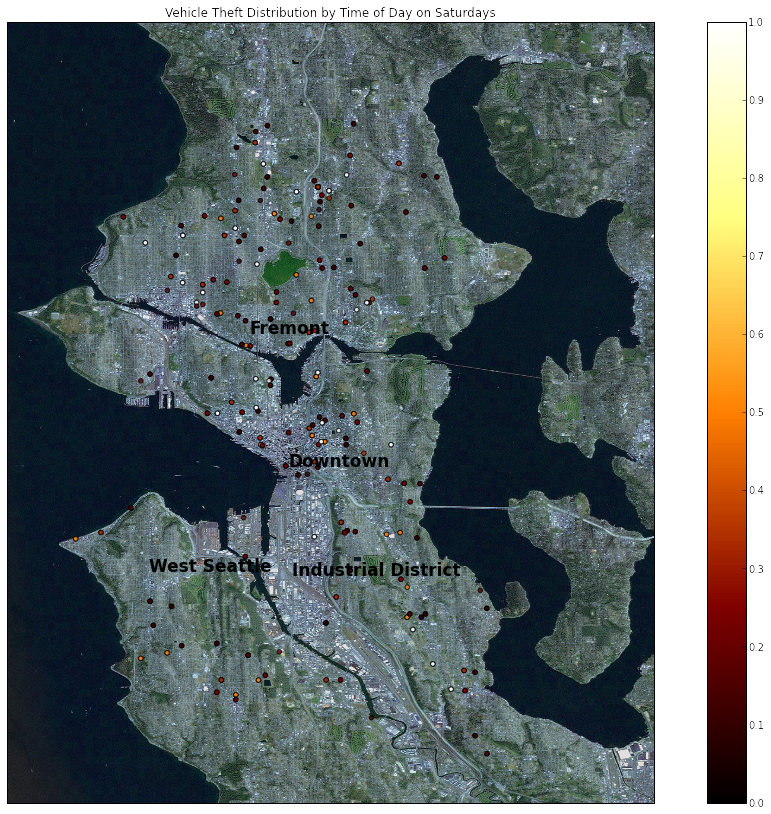

In [105]:
saturday_vehicle_index = vehicle_index & (df.loc[:, "Occurred WeekDay"] == "Saturday")
hour_color = [time.strptime(d, "%m/%d/%Y %H:%M:%S %p").tm_hour
                          for d in df.loc[saturday_vehicle_index, "Occurred Date or Date Range Start"].values]
hour_color = [1.0 / (np.abs(x - 12) + 1.0) for x in hour_color]

map = Basemap(projection='cyl', lat_0 = mean_lat, lon_0 = mean_long,
    resolution = 'i', area_thresh = 0.1,
    llcrnrlon=mean_long - size , llcrnrlat=mean_lat - size,
    urcrnrlon=mean_long + size, urcrnrlat=mean_lat + size + 0.05, epsg=4269)
lons = df.loc[saturday_vehicle_index, "Longitude"].values
lats = df.loc[saturday_vehicle_index, "Latitude"].values
map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True, zorder=0)
for i in xrange(len(x_l)):
    plt.text(x_l[i], y_l[i], location_names[i], fontsize=17, weight = 'bold')
x,y = map(lons, lats)
for i in xrange(len(x)):
    plt.scatter(x[i], y[i], marker='o', c=m.to_rgba(hour_color[i]) , alpha=0.8)
plt.colorbar(m)
plt.title('Vehicle Theft Distribution by Time of Day on Saturdays')
plt.show()

## Conclusion
The comparison of Friday and Saturday shows that especially in the more dense Downtown and Fremont, Friday night seems to be more dangerous for vehicles to be stolen. This could be due to simply being less cars on the road and parking during weekends. 